In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df_1dernp_v00 = pd.read_csv('data/data file 2b/data_1_1_der.csv')


In [3]:
data2 = df_1dernp_v00.copy()

In [4]:
# Encode the 'thnoth_name' column
label_encoder = LabelEncoder()
data2['thnoth_name_encoded'] = label_encoder.fit_transform(data2['thnoth_name'])

In [ ]:
print(data2.head())

In [5]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

# Define X (features) and y (target)
X = data2.drop(columns=['prov_char', 'thnoth_name', 'thnoth_name_encoded'])
y = data2['thnoth_name_encoded']

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a PLS model
pls = PLSRegression(n_components=2)  # Number of components can be adjusted
pls.fit(X_scaled, y)

# Function to calculate VIP scores
def calculate_vip(pls, X):
    t = pls.x_scores_
    w = pls.x_weights_
    q = pls.y_loadings_
    p = pls.x_loadings_
    
    vip_scores = np.zeros(X.shape[1])
    s = np.diag(t.T @ t @ q.T @ q).reshape(-1)
    total_s = np.sum(s)
    
    for i in range(X.shape[1]):
        weight = np.array([((w[i, j] ** 2) * s[j]) for j in range(len(s))])
        vip_scores[i] = np.sqrt(X.shape[1] * np.sum(weight) / total_s)
    
    return vip_scores

# Calculate VIP scores
vip_scores = calculate_vip(pls, X_scaled)

# Filter numeric wavenumbers
wavenumbers = [int(col) for col in X.columns if col.isdigit()]

# Ensure the lengths match
if len(wavenumbers) == len(vip_scores):
    vip_df = pd.DataFrame({'Wavenumber': wavenumbers, 'VIP Score': vip_scores})
else:
    raise ValueError("Mismatch in length between wavenumbers and VIP scores")

# Sort the Data2Frame by wavenumber
vip_df = vip_df.sort_values(by='Wavenumber')

# Save the VIP scores Data2Frame for plotting
#vip_df.to_csv('/mnt/data2/vip_scores.csv', index=False)


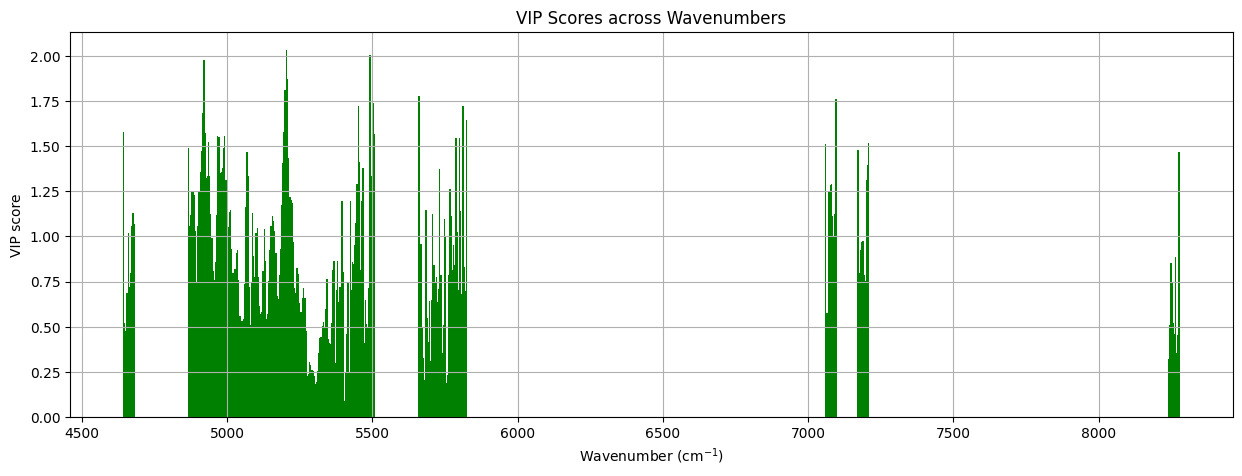

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate the plot
plt.figure(figsize=(15, 5))
plt.bar(vip_df['Wavenumber'], vip_df['VIP Score'], width=5, color='green')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('VIP score')
plt.title('VIP Scores across Wavenumbers')
plt.grid(True)
plt.show()

In [7]:
data3 = data2.copy()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the target variable
target = 'thnoth_name_encoded'

# Define the features and groups
X = data3.drop(columns=['prov_char', 'thnoth_name', 'thnoth_name_encoded'])
y = data3[target]
groups = data3['prov_char']

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize the classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Arrays to store results
accuracies = []
feature_importances = []

# Perform LOGO-CV
for train_idx, test_idx in logo.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Store feature importances
    feature_importances.append(rf.feature_importances_)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

# Calculate mean feature importances
mean_feature_importances = np.mean(feature_importances, axis=0)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mean_feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Save the feature importances
#feature_importance_df.to_csv('/mnt/data/feature_importances.csv', index=False)


Mean Accuracy: 0.8545845339928044


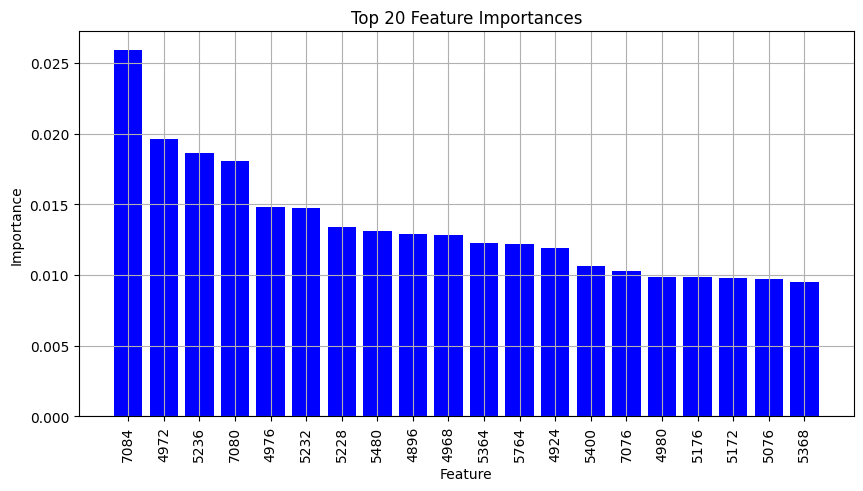

In [9]:
# Load the feature importances
#feature_importance_df = pd.read_csv('/mnt/data/feature_importances.csv')

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()